In [1]:
# load Data
from keras.datasets import imdb

In [3]:
(train_data, train_labels),(test_data, test_labels)= imdb.load_data(num_words=10000)

In [4]:
#label都是由0或1组成，0表示负面，1表示正面
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
#将没条评论迅速解码成英文
word_index = imdb.get_word_index()#将单词映射到整个索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

## 准备数据
不能直接把数据输入到神经网络，需要将列表转换成张量，转换方式有以下两种：

- 填充列表，使其具有相同的长度，再将列表转换成形状为（samples ,word_indices）的整数张量，然后网络第一层使用能处理这种整数张量的层（Embedding）
- 对列表进行one-hot编码，将其转换为0和1组成的向量。

In [13]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    '''
    转换成张量
    '''
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
#标签也需要向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 构建网络

这种Dense层的堆叠，需要确认两个关键架构
- 网络有多少层
- 每层有多少个隐藏单元


In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
#编译模型

#配置优化器
from keras import optimizers

# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) #方式一

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

#使用自定义的损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [27]:
#留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
#训练模型
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_binary_

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

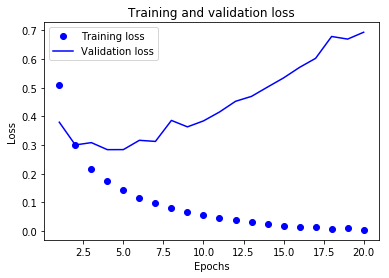

In [31]:
## 绘制训练损失和验证损失
history_dict = history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)


import matplotlib.pyplot as plt

plt.plot(epochs,loss_values,'bo',label ='Training loss')#bo表示蓝色原点
plt.plot(epochs,val_loss_value,'b',label = 'Validation loss')# b表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

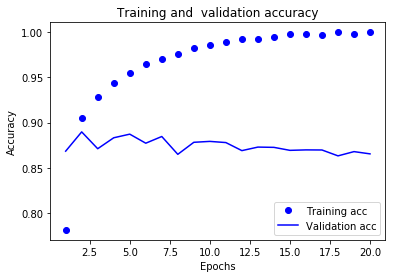

In [33]:
## 绘制训练精度和验证精度
plt.clf # 清空图像
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs,acc,'bo', label='Training acc')
plt.plot(epochs,val_acc,'b', label = 'Validation acc')
plt.title('Training and  validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

上图过拟合

In [34]:
## 重头开始训练，到第四轮停止
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

model.fit(x_train,y_train,epochs=4,batch_size=512)
result = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.4749 - binary_accuracy: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 38us/step - loss: 0.2658 - binary_accuracy: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 37us/step - loss: 0.1982 - binary_accuracy: 0.9299
Epoch 4/4
25000/25000 [==============================] - 1s 55us/step


In [35]:
result

[0.3231545869159698, 0.87348]

### 用训练好的模型在新数据上进行预测

In [36]:
model.predict(x_test)

array([[0.1402615 ],
       [0.9997029 ],
       [0.29552558],
       ...,
       [0.07234979],
       [0.04342841],
       [0.48153415]], dtype=float32)